In this chapter, you will become acquainted with the powertool of pandas - the DataFrame. You will learn how to use pandas to import and then inspect a variety of datasets, ranging from population data obtained from The World Bank to monthly stock data obtained via Yahoo! Finance. You will practice building DataFrames from scratch and become familiar with pandas' data visualization capabilities.

# Pandas Foundations

## What is pandas?
- python library for data analysis
- High-performance containers for data analysis
- Data structures with a lot of functionality
    - meaningul labels
    - time series functionsality
    - handling missing data
    - relational operations
    
## What will you learn
- how to work with pandas
    - data import/export in various formats
- exploratory data analysis using pandas
    - statistical & graphical methods
- usign padnas to model *time series*
    - time indexes, resampling
    
    
---

---
<center> <h1>Review of pandas DataFrames</h1> </center>

Pandas is a library fo data analysis.

The powertool of Pandas is the DataFrame, a tabular data structure with labeled  rowsn & columns

### pandas `DataFrames`
- example DataFrame of Apple stock data

- rows are labeled by a special data structure called an Index,
- Indexes in Pandas are tailored list of labels that perimt fast look-up and some powerfull relational operations.

- In this dataset, The index labels are dates in reveser chronological order
- Labeled rows & columns improves the clarity and intuition of may data analysis tasks


```
	AdjClose	Close	High	Low	Open	Volume
Date						
2014-12-31	104.861462	110.38	113.13	110.21	112.82	41403351.0
2014-12-30	106.894471	112.52	113.92	112.11	113.64	29881477.0
2014-12-29	108.214976	113.91	114.77	113.70	113.79	27598920.0
2014-12-26	108.290977	113.99	114.52	112.01	112.10	33720951.0
2014-12-24	106.409968	112.01	112.71	112.01	112.58	14479611.0
```

In [1]:
#!pip install pandas_datareader

In [2]:
import pandas as pd
import pandas_datareader.data as web
import datetime



start = datetime.datetime(1980,1,1)
end = datetime.datetime(2015,1,1)
 
AAPL = web.DataReader("AAPL", "quandl", start, end)
 
#AAPL.info()

In [3]:
cols = ['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume']  # edit to mimic tutorial :)
AAPL = AAPL[cols]
AAPL.head()

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,41403351.0
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,33720951.0
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0


## Indexes and columns

In [4]:
type(AAPL)  # returns a dataframe

pandas.core.frame.DataFrame

In [5]:
AAPL.shape  # returns 858 rows and 6 columns

(8588, 6)

In [6]:
AAPL.columns  # returns the names of its columns

Index(['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [7]:
type(AAPL.columns)  # returns a pandas index  ( b/c each col is a series, therfore it has its own index?)

pandas.core.indexes.base.Index

In [8]:
type(AAPL.index)  # returns a special kind of index called Datetime Index

pandas.core.indexes.datetimes.DatetimeIndex

## Slicing

Dataframes can be sliced like NumPy arrays or Python list using colons to specify the start, end and stride of a slice.

First we can slice from teh start of the DataFrame to teh 5th row(non-inclusive) using the `.iloc` accessor to express the lice positionally
```python
AAPL.iloc[:5,:]
```
Second we can slice from the 5th last row to the end of the DataFrame using a negative index.

```python
AAPL.iloc[-5:,:]
```

In [9]:
AAPL.iloc[:5,:]

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,41403351.0
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,33720951.0
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0


In [10]:
AAPL.iloc[-5:,:]

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-18,0.391536,26.63,26.75,26.63,26.63,327900.0
1980-12-17,0.380362,25.87,26.00,25.87,25.87,385900.0
1980-12-16,0.371246,25.25,25.37,25.25,25.37,472000.0
1980-12-15,0.400652,27.25,27.38,27.25,27.38,785200.0
1980-12-12,0.422706,28.75,28.87,28.75,28.75,2093900.0


## `head()`

If you want to se just the top rows of a DataFrame you can use the `head()` method.
Its very usefull to see a glimpse of your data without loading all the rows.

Specifing `AAPL.head(5)` returns the first 5 rows of the DataFrame


In [11]:
AAPL.head(5)

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,41403351.0
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,33720951.0
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0


## `tail()`

- Specifing `.tail()` without an argument returns the last five rows by default
- specifing `.tail(3)` returns the  last three rows 

In [12]:
AAPL.tail()

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-18,0.391536,26.63,26.75,26.63,26.63,327900.0
1980-12-17,0.380362,25.87,26.00,25.87,25.87,385900.0
1980-12-16,0.371246,25.25,25.37,25.25,25.37,472000.0
1980-12-15,0.400652,27.25,27.38,27.25,27.38,785200.0
1980-12-12,0.422706,28.75,28.87,28.75,28.75,2093900.0


In [13]:
AAPL.tail(3)

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-16,0.371246,25.25,25.37,25.25,25.37,472000.0
1980-12-15,0.400652,27.25,27.38,27.25,27.38,785200.0
1980-12-12,0.422706,28.75,28.87,28.75,28.75,2093900.0


## `.info()`

- Returns othe ruseful summary information, including the kind of index, the column labels, number of rows & columns, and the datatype of each column.

In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8588 entries, 2014-12-31 to 1980-12-12
Data columns (total 6 columns):
AdjClose    8588 non-null float64
Close       8588 non-null float64
High        8588 non-null float64
Low         8588 non-null float64
Open        8588 non-null float64
Volume      8588 non-null float64
dtypes: float64(6)
memory usage: 469.7 KB


## Broadcasting

In [15]:
import numpy as np

AAPL.iloc[::3,-1] = np.nan  # assinging scalar value to column, slice broadcast value to each row

AAPL.head(7)

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-31,104.861462,110.38,113.13,110.21,112.82,NaN
2014-12-30,106.894471,112.52,113.92,112.11,113.64,29881477.0
2014-12-29,108.214976,113.91,114.77,113.70,113.79,27598920.0
2014-12-26,108.290977,113.99,114.52,112.01,112.10,NaN
2014-12-24,106.409968,112.01,112.71,112.01,112.58,14479611.0
2014-12-23,106.913471,112.54,113.33,112.46,113.23,26028419.0
2014-12-22,107.293472,112.94,113.49,111.97,112.16,NaN


In [16]:
# Volume    5923 non-null float64,  not 8885
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8588 entries, 2014-12-31 to 1980-12-12
Data columns (total 6 columns):
AdjClose    8588 non-null float64
Close       8588 non-null float64
High        8588 non-null float64
Low         8588 non-null float64
Open        8588 non-null float64
Volume      5725 non-null float64
dtypes: float64(6)
memory usage: 469.7 KB


## Series

- The columns of a DataFrame are themseldves a specialize Pandas structure called a Series
- Extracting a single column from a DataFrame returns a Series
-  An extracted Series has itns own `.head()` methid and inherits its name attribute from the DataFrame column.
- To extract the numerical enries from the Series, youse the valeus attribute.
- The Data in teh Series actually form a NumPy array which is what the value attribute yields

A Pandas Series is a 1D labelled NumPy array and a DataFrame is a 2D labelled array whose columns are Series.

In [17]:
low = AAPL['Low']

type(low)

pandas.core.series.Series

In [18]:
low.head()

Date
2014-12-31    110.21
2014-12-30    112.11
2014-12-29    113.70
2014-12-26    112.01
2014-12-24    112.01
Name: Low, dtype: float64

In [19]:
lows = low.values
type(lows) # array([   0.5134,    0.4866,    0.4509, ...,  112.11  ,  110.21  ,  110.38  ])

numpy.ndarray

In [20]:
# # EXAMPLE
# # Import numpy
# import numpy as np

# # Create array of DataFrame values: np_vals
# np_vals = df.values

# # Create new array of base 10 logarithm values: np_vals_log10
# np_vals_log10 = np.log10(np_vals)

# # Create array of new DataFrame by passing df to np.log10(): df_log10
# df_log10 = np.log10(df)

# # Print original and new data containers
# print(type(np_vals), type(np_vals_log10))
# print(type(df), type(df_log10))


---

<center> <h1>Building DataFrames from Scratch</h1> </center>

## DataFrames from CSV files

- `.read_csv()` load a DataFrame form a comma-separated-value file


In [21]:
import pandas as pd

users = pd.read_csv('users.csv', index_col=0)
print(users)

           city  visitors  signups
weekday                           
Sun      Austin       139        7
Sun      Dallas       237       12
Mon      Austin       326        3
Mon      Dallas       456        5


## DataFrames from dict() 

- dictionaries (or associative arrays) are a core data structure in Pyhton.

```python
data = {
    'weekday': ['Sun','Sun', 'Mon', 'Mon'],
    'city' : ['Austin', 'Dallas', 'Austin', 'Dallas'],
    'visitors': [139,237,326,456],
    'signups' : [7,12,3,5]
}
```
- Keys of the dictionary data are use as column labels
- with no index specified, teh row labels are the integers zero to three by default

In [22]:
import pandas as pd

data = {
    'weekday': ['Sun','Sun', 'Mon', 'Mon'],
    'city' : ['Austin', 'Dallas', 'Austin', 'Dallas'],
    'visitors': [139,237,326,456],
    'signups' : [7,12,3,5]
}

users_d = pd.DataFrame(data)

print(users_d)

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


## DataFrames from dict() 

- conforming lists: `cities`, `signups`, `visitors`, `weekdays` 
- additional lists: `list_labels` & `list_cols`
- using list() and zip() function constucts a list called zipped of tupples(column names and columns)
- calling `dict(zipped)` creates a dict data which then usde with pd.dataframe to build the DataFrame

```python
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7,12,3,5]
visitors = [139,237,326,456]
weekdays = ['Sun','Sun', 'Mon', 'Mon']

list_labels = ['city', 'signups','visitors','weekday']  # contain column labels
list_cols = [cities,signups, visitors, weekdays]  # list of lists

zipped = list(zip(list_labels, list_cols))

data = dict(zipped)
users_d2 = pd.DataFrame(data)
```


In [23]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7,12,3,5]
visitors = [139,237,326,456]
weekdays = ['Sun','Sun', 'Mon', 'Mon']

list_labels = ['city', 'signups','visitors','weekday']

list_cols = [cities,signups, visitors, weekdays]

zipped = list(zip(list_labels, list_cols))

print(zipped)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 3, 5]), ('visitors', [139, 237, 326, 456]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]


In [24]:
data = dict(zipped)
users_d2 = pd.DataFrame(data)
print(users_d2)

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon


## Broadcasting

- convenient techinque in NumPy and Pandas

- with users in memory, a new col named 'fees' can be created on the fly.
- by assinging it to the scalar value of 0, the value is *broadcast* to the entire column

- Broadcasting saves time in generating ling list, arrays or columns without loops

In [25]:
users['fees'] = 0 # broadcast to entire column

print(users)

           city  visitors  signups  fees
weekday                                 
Sun      Austin       139        7     0
Sun      Dallas       237       12     0
Mon      Austin       326        3     0
Mon      Dallas       456        5     0


## Broadcasting with a dict

- Broadcasting is not restricted to numbers
- here we created a dic data with column labels height and sex as keys and a single-character string 'M' as values

- when the dict data is used to crate DataFrame results, teh value 'M' is broadcast to the entire column.

In [26]:
heights = [59.0, 65.2, 62.9, 65.4, 63.7, 65.7, 64.1]

data = {'height':heights,'sex': 'M'}

results = pd.DataFrame(data)

print(results)

   height sex
0    59.0   M
1    65.2   M
2    62.9   M
3    65.4   M
4    63.7   M
5    65.7   M
6    64.1   M


## Index and column

- We can change the column and index labesl using the columns and index attriburts of a Pandas DataFrame
- we can assign list of strings to the attriburts columns and index as long as they are of sutable length 

In [27]:
results.columns = ['height (in)', 'sex']

results.index = ['A', 'B','C', 'D', 'E', 'F', 'G']

print(results)

   height (in) sex
A         59.0   M
B         65.2   M
C         62.9   M
D         65.4   M
E         63.7   M
F         65.7   M
G         64.1   M


In [28]:
# DATA
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'],[1118, 473,273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys,list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)


[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [29]:
## EXAMPLE 2
# Labeling your data

data = {
    'a': [1980,1981, 1982],
    'b' : ['Blondie', 'Christopher Cross', 'Joann Jet'],
    'c': ['Call me','Aurthur Theme','I Love Rock n Roll'],
    'd': [6,3,7]
   
}
df = pd.DataFrame(data)


# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

df.head()

,year,artist,song,chart weeks
0,1980,Blondie,Call me,6
1,1981,Christopher Cross,Aurthur Theme,3
2,1982,Joann Jet,I Love Rock n Roll,7


In [30]:
!# EXAMPLE
# Building DataFrames with broadcasting

cities = ['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']


# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

               city state
0           Manheim    PA
1      Preston park    PA
2       Biglerville    PA
3           Indiana    PA
4      Curwensville    PA
5             Crown    PA
6      Harveys lake    PA
7   Mineral springs    PA
8         Cassville    PA
9        Hannastown    PA
10        Saltsburg    PA
11      Tunkhannock    PA
12       Pittsburgh    PA
13        Lemasters    PA
14       Great bend    PA


---

<h1> Importing & exporting data </h1>

## original CSV file
- Dataset: sunpsopt observations collected from SILSO

## Datasets from CSV files

In [31]:
import pandas as pd

filepath = 'ISSN_D_tot.csv'

sunspots = pd.read_csv(filepath, sep=';')

In [32]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73079 entries, 0 to 73078
Data columns (total 8 columns):
1818        73079 non-null int64
01          73079 non-null int64
01.1        73079 non-null int64
1818.001    73079 non-null float64
  -1        73079 non-null int64
 -1.0       73079 non-null float64
   0        73079 non-null int64
1           73079 non-null int64
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [33]:
sunspots.iloc[10:20, :]

,1818,01,01.1,1818.001,-1,-1.0,0,1
10,1818,1,12,1818.032,-1,-1.0,0,1
11,1818,1,13,1818.034,37,7.7,1,1
12,1818,1,14,1818.037,-1,-1.0,0,1
13,1818,1,15,1818.040,-1,-1.0,0,1
14,1818,1,16,1818.042,-1,-1.0,0,1
15,1818,1,17,1818.045,77,11.1,1,1
16,1818,1,18,1818.048,98,12.6,1,1
17,1818,1,19,1818.051,105,13.0,1,1
18,1818,1,20,1818.053,-1,-1.0,0,1
19,1818,1,21,1818.056,-1,-1.0,0,1


## Problems

- CSV file has no columns headers
    - columns 0-2: gregorian date (year,month day)
    - columns 3: date4 as fractiona as year
    - column 4: daily total sunspots number
    - column 5: defenitive/provisional indicator (1 or 0)
- missing values in column 4: indicated by -1
- dates representation inconvenient


## Using keywords

In [34]:
sunspots = pd.read_csv(filepath,sep=';', 
                       usecols=[0,1,2,3,4,7],
                       header = None)
# remove col 5,6 not needed
sunspots.iloc[10:20, :]

#sunspots.info()

,0,1,2,3,4,7
10,1818,1,11,1818.029,-1,1
11,1818,1,12,1818.032,-1,1
12,1818,1,13,1818.034,37,1
13,1818,1,14,1818.037,-1,1
14,1818,1,15,1818.040,-1,1
15,1818,1,16,1818.042,-1,1
16,1818,1,17,1818.045,77,1
17,1818,1,18,1818.048,98,1
18,1818,1,19,1818.051,105,1
19,1818,1,20,1818.053,-1,1



## using names keyword

In [35]:
col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','std','obs_num' ,'definite']

#col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','definite']

sunspots = pd.read_csv(filepath,  na_values = ["-1", '-1.0'],
                       header = None,
                       sep=';', 
                       #usecols=[0,1,2,3,4,7], 
                       names=col_names)

#sunspots.sunspots = sunspots.sunspots.astype(float)
#sunspots.iloc[10:20, :]
#sunspots.head()
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73080 entries, 0 to 73079
Data columns (total 8 columns):
year        73080 non-null int64
month       73080 non-null int64
day         73080 non-null int64
dec_date    73080 non-null float64
sunspots    73080 non-null int64
std         69833 non-null float64
obs_num     73080 non-null int64
definite    73080 non-null int64
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


## Using na_values keywords

In [36]:
sunspots.head()  # does not work!!

,year,month,day,dec_date,sunspots,std,obs_num,definite
0,1818,1,1,1818.001,-1,NaN,0,1
1,1818,1,2,1818.004,-1,NaN,0,1
2,1818,1,3,1818.007,-1,NaN,0,1
3,1818,1,4,1818.010,-1,NaN,0,1
4,1818,1,5,1818.012,-1,NaN,0,1


## Using parse_dates keyword

In [37]:
#col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','std','obs_num' ,'definite']

col_names = ['year', 'month', 'day', 'dec_date', 'sunspots','definite']

sunspots = pd.read_csv(filepath,
                       sep=';', 
                       usecols=[0,1,2,3,4,7], 
                       names=col_names,
                       na_values={'sunspots':[' -1']},  # does not work
                      parse_dates=[[0,1,2]])

#sunspots.head()
sunspots.iloc[10:20, :]


,year_month_day,dec_date,sunspots,definite
10,1818-01-11,1818.029,-1,1
11,1818-01-12,1818.032,-1,1
12,1818-01-13,1818.034,37,1
13,1818-01-14,1818.037,-1,1
14,1818-01-15,1818.040,-1,1
15,1818-01-16,1818.042,-1,1
16,1818-01-17,1818.045,77,1
17,1818-01-18,1818.048,98,1
18,1818-01-19,1818.051,105,1
19,1818-01-20,1818.053,-1,1


## Inspecting DataFrame

In [38]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73080 entries, 0 to 73079
Data columns (total 4 columns):
year_month_day    73080 non-null datetime64[ns]
dec_date          73080 non-null float64
sunspots          73080 non-null int64
definite          73080 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.2 MB


## using dates as index

In [39]:
sunspots.index = sunspots['year_month_day']

sunspots.index.name = 'date'  # change the col name to date

sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73080 entries, 1818-01-01 to 2018-01-31
Data columns (total 4 columns):
year_month_day    73080 non-null datetime64[ns]
dec_date          73080 non-null float64
sunspots          73080 non-null int64
definite          73080 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.8 MB


## trimming redundant columns

In [40]:
cols = ['sunspots', 'definite']

sunspots = sunspots[cols]

sunspots.iloc[10:20, :]

,sunspots,definite
date,,
1818-01-11,-1,1
1818-01-12,-1,1
1818-01-13,37,1
1818-01-14,-1,1
1818-01-15,-1,1
1818-01-16,-1,1
1818-01-17,77,1
1818-01-18,98,1
1818-01-19,105,1


## Writting files

In [41]:
#!pip install openpyxl

In [42]:
out_csv = 'sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'sunspots.tsv'
sunspots.to_csv(out_tsv, sep='\t')

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel(out_xlsx)

In [56]:
## EXAMPLE
# Reading a flat file

# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


In [57]:
# EXAMPLE
# Delimiters, headers, and extensions

# Read the raw file as-is: df1
df1 = pd.read_csv('messy_stock_data.tsv')

# Print the output of df1.head()
print(df1.head(5))

# Read in the file with the correct parameters: df2
df2 = pd.read_csv('messy_stock_data.tsv', delimiter=' ', header= 3, comment= '#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

NameError: name 'file_clean' is not defined

---

# Plotting with pandas

## AAPL stock data

In [59]:
# aapl = pd.read_csv('aapl.csv')
# aapl = aapl.set_index(['date'])
# aapl = aapl.drop(['Unnamed: 0'], axis=1)
# aapl.info()

aapl = pd.read_csv('aapl.csv', index_col='date',parse_dates=True)  # parse_dates makes better for graph
aapl = aapl.drop(['Unnamed: 0'], axis=1)
aapl.head()



,adj_close,close,high,low,open,volume
date,,,,,,
2000-03-01,31.68,130.31,132.06,118.50,118.56,38478000
2000-03-02,29.66,122.00,127.94,120.69,127.00,11136800
2000-03-03,31.12,128.00,128.23,120.00,124.87,11565200
2000-03-06,30.56,125.69,129.13,125.00,126.00,7520000
2000-03-07,29.87,122.87,127.44,121.12,126.44,9767600


## Plotting arrays (matplotlib)


In [61]:
close_arr = aapl['close'].values

In [62]:
type(close_arr)

numpy.ndarray

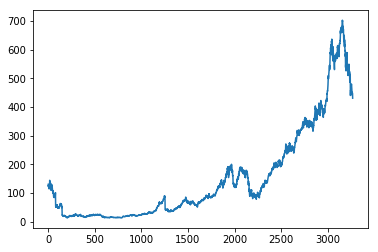

In [63]:
import matplotlib.pyplot as plt

plt.plot(close_arr)
plt.show()

## plotting Series (matplotlib)

In [64]:
close_series = aapl['close']
type(close_series)

pandas.core.series.Series

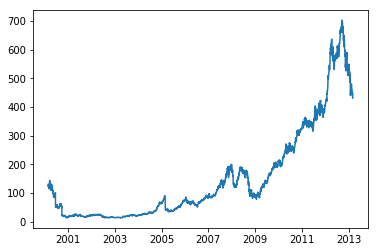

In [65]:
plt.plot(close_series)
plt.show()

## Plotting Series (pandas)

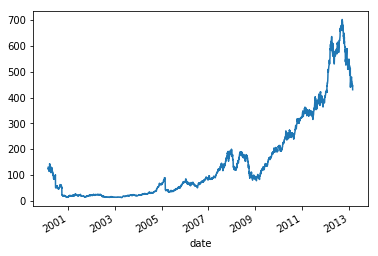

In [66]:
close_series.plot()  # plots Series directly
plt.show()

## plotting Dataframes (pandas)

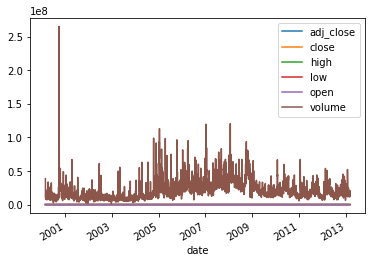

In [67]:
aapl.plot()  # plots ALL Series at one
plt.show()

## plotting DataFrames (matplotlib)

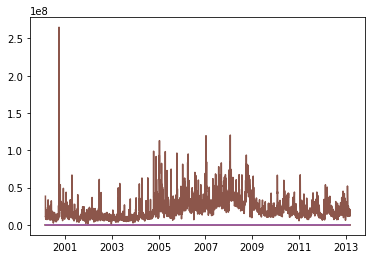

In [68]:
plt.plot(aapl)  # plots all col at once

plt.show()

## Fixing scale

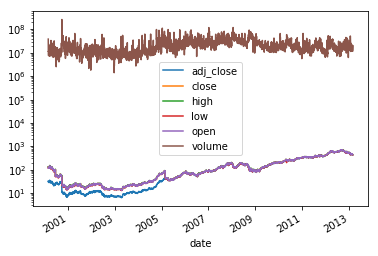

In [69]:
aapl.plot()
plt.yscale('log')  # logarithmic scale on vertical axis
plt.show()

## Customizing plots

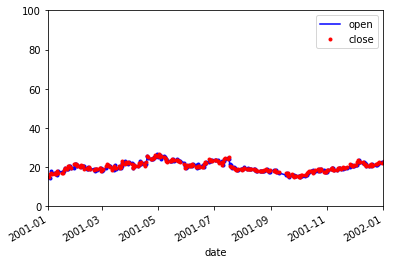

In [70]:
aapl['open'].plot(color='b', style='.-', legend=True)
aapl['close'].plot(color='r', style='.', legend=True)

plt.axis(('2001','2002',0, 100))
plt.show()

## Saving plots

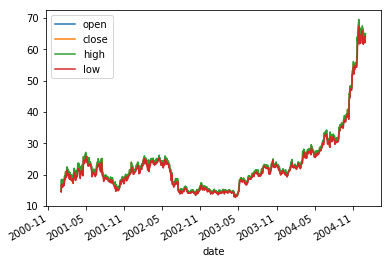

In [71]:
aapl.loc['2001':'2004',['open','close','high', 'low']].plot()


In [72]:
plt.savefig('aapl.png')
plt.savefig('aapl.jpg')

plt.savefig('aapl.pdf')
plt.show()

In [74]:
df = pd.read_csv('weather_data_austin_2010 (1).csv')
df.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


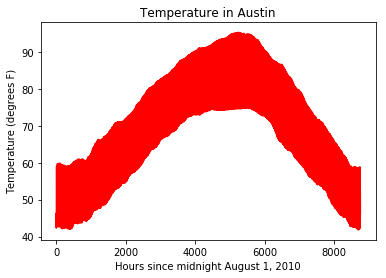

In [75]:
# EXAMPLE
# Plotting series using pandas
df = pd.read_csv('weather_data_austin_2010 (1).csv')


df = df['Temperature']



# Create a plot with color='red'
df.plot(color='red')



# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label

plt.xlabel('Hours since midnight August 1, 2010')
# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

In [76]:
## EXAMPLE
# Plotting DataFrames
df = pd.read_csv('weather_data_austin_2010 (1).csv')
cols = ['Temperature','DewPoint','Pressure']
df = df[cols]

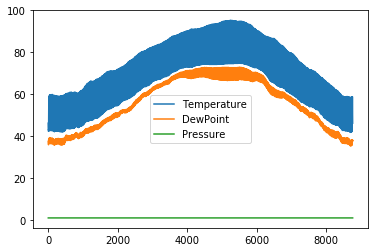

In [77]:
# Plot all columns (default)
df.plot()
plt.show()

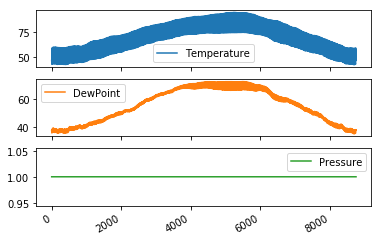

In [78]:
# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

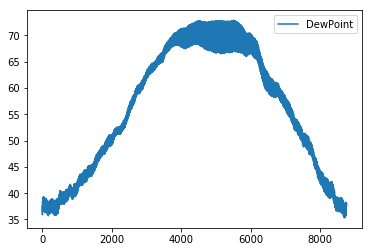

In [79]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
df[column_list1].plot()
plt.show()

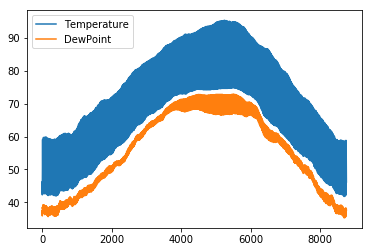

In [80]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].plot()
plt.show()